In [1]:
# Instalar la biblioteca Gymnasium, una evolución de Gym
!pip install gymnasium

# Instalar pyvirtualdisplay para manejar displays virtuales, necesario para renderizar gráficos sin una pantalla física
!pip install pyvirtualdisplay

# Instalar xvfb y x11-utils, herramientas necesarias para manejar el display virtual
!apt-get install -y xvfb x11-utils

# Instalar ffmpeg, herramienta para manejar la grabación y combinación de videos
!apt-get install -y ffmpeg

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 953.9/953.9 kB 6.3 MB/s eta 0:00:00
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libfontenc1 libxfont2 libxkbfile1 libxtst6 libxxf86dga1 x11-xkb-utils xfonts-base
  xfonts-encodings xfonts-utils xserver-common
Suggested packages:
  mesa-utils
The following NEW packages will be installed:
  libfontenc1 libxfont2 libxkbfile1 libxtst6 libxxf86dga1 x11-utils x11-xkb-utils xfonts-base
  xfonts-encodings xfonts-utils xserver-common xvfb
0 upgraded, 12 newly installed, 0 to remove and 45 not upgraded.
Need to get 8,045 kB of archives.
After this operation, 12.8 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/main amd64 libfontenc1 amd64 1:1.1.4-1build3 [14.7 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/main amd64 libxfont2 amd64 1:2.0.5-1build1 [94.5 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/m

In [2]:
# Importar y configurar un display virtual
from pyvirtualdisplay import Display
display = Display(visible=0, size=(1400, 900))  # Crear un display virtual con las dimensiones especificadas
display.start()  # Iniciar el display virtual

# Importar las bibliotecas necesarias
import gymnasium as gym  # Importar Gymnasium para crear y manejar entornos de RL
import numpy as np  # Importar numpy para manejar cálculos numéricos
import matplotlib.pyplot as plt  # Importar matplotlib para graficar
from gymnasium.wrappers import RecordVideo  # Importar RecordVideo para grabar videos de los episodios

In [3]:
# Crear el entorno 'MountainCar-v0' y envolverlo con RecordVideo para grabar videos de los episodios
env = gym.make('MountainCar-v0', render_mode='rgb_array')
env = RecordVideo(env, video_folder="./videos", episode_trigger=lambda e: e % 100 == 0)  # Grabar un video cada 100 episodios

# Inicializar la tabla Q con ceros
q_table = np.zeros((20, 20, 3))  # La tabla Q tiene dimensiones 20x20x3 debido a la discretización del espacio de estados y acciones

# Configurar parámetros para el entrenamiento
total_episodes = 1000  # Número total de episodios para entrenamiento
learning_rate = 0.1  # Tasa de aprendizaje (alpha)
discount_rate = 0.99  # Factor de descuento (gamma)
epsilon = 0.9  # Valor inicial de epsilon para la política epsilon-greedy
min_epsilon = 0.01  # Valor mínimo de epsilon para asegurar una mínima exploración
epsilon_decay = 0.995  # Tasa de decaimiento de epsilon para reducir la exploración a medida que se aprende

In [4]:
def get_discrete_state(state):
    # Definir los rangos para la discretización
    pos_space = np.linspace(-1.2, 0.6, 19)  # 20 divisiones para la posición
    vel_space = np.linspace(-0.07, 0.07, 19)  # 20 divisiones para la velocidad

    # Usar digitize para mapear el valor continuo al índice del bin correspondiente
    pos_idx = np.digitize(state[0], pos_space) - 1  # -1 para ajustar el índice
    vel_idx = np.digitize(state[1], vel_space) - 1

    return (pos_idx, vel_idx)  # Retornar el estado discreto como una tupla

Moviepy - Building video /content/videos/rl-video-episode-0.mp4.
Moviepy - Writing video /content/videos/rl-video-episode-0.mp4



Moviepy - Done !
Moviepy - video ready /content/videos/rl-video-episode-0.mp4
Moviepy - Building video /content/videos/rl-video-episode-100.mp4.
Moviepy - Writing video /content/videos/rl-video-episode-100.mp4



Moviepy - Done !
Moviepy - video ready /content/videos/rl-video-episode-100.mp4
Moviepy - Building video /content/videos/rl-video-episode-200.mp4.
Moviepy - Writing video /content/videos/rl-video-episode-200.mp4



Moviepy - Done !
Moviepy - video ready /content/videos/rl-video-episode-200.mp4
Moviepy - Building video /content/videos/rl-video-episode-300.mp4.
Moviepy - Writing video /content/videos/rl-video-episode-300.mp4



Moviepy - Done !
Moviepy - video ready /content/videos/rl-video-episode-300.mp4
Moviepy - Building video /content/videos/rl-video-episode-400.mp4.
Moviepy - Writing video /content/videos/rl-video-episode-400.mp4



Moviepy - Done !
Moviepy - video ready /content/videos/rl-video-episode-400.mp4
Moviepy - Building video /content/videos/rl-video-episode-500.mp4.
Moviepy - Writing video /content/videos/rl-video-episode-500.mp4



Moviepy - Done !
Moviepy - video ready /content/videos/rl-video-episode-500.mp4
Moviepy - Building video /content/videos/rl-video-episode-600.mp4.
Moviepy - Writing video /content/videos/rl-video-episode-600.mp4



Moviepy - Done !
Moviepy - video ready /content/videos/rl-video-episode-600.mp4
Moviepy - Building video /content/videos/rl-video-episode-700.mp4.
Moviepy - Writing video /content/videos/rl-video-episode-700.mp4



Moviepy - Done !
Moviepy - video ready /content/videos/rl-video-episode-700.mp4
Moviepy - Building video /content/videos/rl-video-episode-800.mp4.
Moviepy - Writing video /content/videos/rl-video-episode-800.mp4



Moviepy - Done !
Moviepy - video ready /content/videos/rl-video-episode-800.mp4
Moviepy - Building video /content/videos/rl-video-episode-900.mp4.
Moviepy - Writing video /content/videos/rl-video-episode-900.mp4



Moviepy - Done !
Moviepy - video ready /content/videos/rl-video-episode-900.mp4
Moviepy - Building video /content/videos/rl-video-episode-1000.mp4.
Moviepy - Writing video /content/videos/rl-video-episode-1000.mp4



Moviepy - Done !
Moviepy - video ready /content/videos/rl-video-episode-1000.mp4


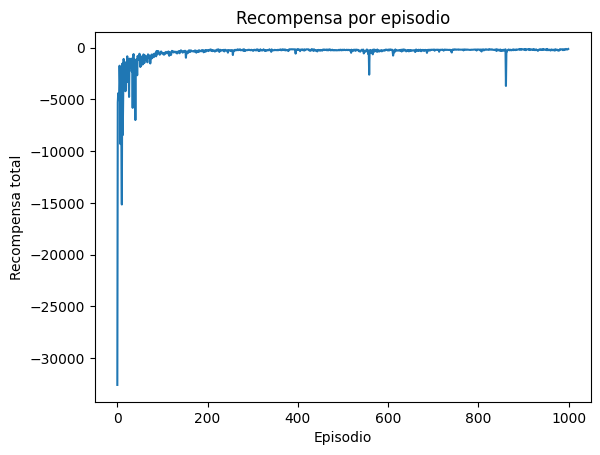

In [5]:
# Lista para almacenar las recompensas totales por episodio
rewards = []

# Bucle de entrenamiento
for episode in range(total_episodes):
    # print(episode)  # Imprimir el número de episodio
    discrete_state = get_discrete_state(env.reset()[0])  # Reiniciar el entorno y obtener el estado inicial discreto
    done = False
    total_reward = 0  # Inicializar la recompensa total para el episodio

    while not done:
        if np.random.random() > epsilon:
            action = np.argmax(q_table[discrete_state])  # Seleccionar la acción con mayor valor Q (explotación)
        else:
            action = env.action_space.sample()  # Seleccionar una acción aleatoria (exploración)

        new_state, reward, done, truncated, _ = env.step(action)  # Ejecutar la acción en el entorno
        total_reward += reward  # Acumular la recompensa
        new_discrete_state = get_discrete_state(new_state)  # Obtener el nuevo estado discreto

        max_future_q = np.max(q_table[new_discrete_state])  # Obtener el valor Q máximo para el nuevo estado
        current_q = q_table[discrete_state + (action,)]  # Obtener el valor Q actual para el estado y acción actuales
        new_q = (1 - learning_rate) * current_q + learning_rate * (reward + discount_rate * max_future_q)  # Actualizar el valor Q usando la fórmula Q-learning
        q_table[discrete_state + (action,)] = new_q  # Guardar el nuevo valor Q en la tabla

        discrete_state = new_discrete_state  # Actualizar el estado actual

    rewards.append(total_reward)  # Guardar la recompensa total del episodio
    if epsilon > min_epsilon:
        epsilon *= epsilon_decay  # Reducir epsilon para menos exploración en futuros episodios

env.close()  # Cerrar el entorno

# Graficar las recompensas totales por episodio
plt.plot(rewards)
plt.title('Recompensa por episodio')
plt.xlabel('Episodio')
plt.ylabel('Recompensa total')
plt.show()  # Mostrar el gráfico


In [6]:
# Crear un archivo de texto con la lista de archivos de video
!for f in /content/videos/*.mp4; do echo "file '$f'" >> mylist.txt; done

# Unir todos los archivos de video en un solo archivo
!ffmpeg -f concat -safe 0 -i mylist.txt -c copy output.mp4


ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-libvpx --enab

## Video generado

He subido el video generado a un S3 de AWS para tener el enlace y que lo puedas ver en cualquier momento, sin necesidad de volver a ejecutar el notebook

Video:

https://s3.eu-north-1.amazonaws.com/woztell-files/61dd440160b7ca080e173c57/output.mp4

La imagen es la gráfica de recompensas:

https://s3.eu-north-1.amazonaws.com/woztell-files/61dd440160b7ca080e173c57/image.png